<a href="https://colab.research.google.com/github/nik05-hil/classify-Iris-Flowers/blob/main/interniris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Target: species (0=Setosa, 1=Versicolor, 2=Virginica)

# Create a DataFrame for better visualization
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['Species'] = y
iris_df['Species'] = iris_df['Species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Logistic Regression Results:
Accuracy: 1.00
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
def predict_species(model, scaler, new_flower):
    """
    Predict iris species for new flower measurements
    new_flower should be a list with [sepal_length, sepal_width, petal_length, petal_width]
    """
    # Scale the new flower's measurements
    new_flower_scaled = scaler.transform([new_flower])

    # Make prediction
    pred = model.predict(new_flower_scaled)

    # Map prediction to species name
    species = iris.target_names[pred[0]]

    return species

# Example usage:
new_measurements = [5.1, 3.5, 1.4, 0.2]  # Example measurements
predicted_species = predict_species(log_reg, scaler, new_measurements)  # Using logistic regression
print(f"\nPredicted Species: {predicted_species}")


Predicted Species: setosa


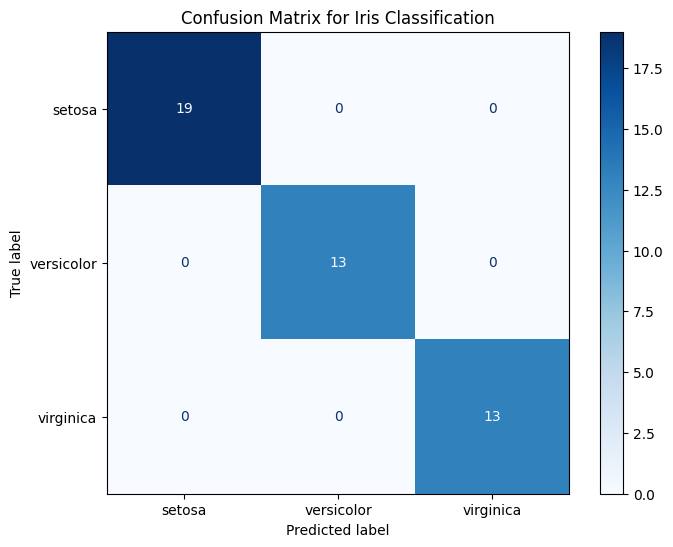

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    log_reg, X_test_scaled, y_test,
    display_labels=iris.target_names,
    cmap=plt.cm.Blues, ax=ax
)
plt.title('Confusion Matrix for Iris Classification')
plt.show()